In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
pip install --user -U numpy

Requirement already up-to-date: numpy in c:\users\vivek\anaconda3\lib\site-packages (1.21.1)
Note: you may need to restart the kernel to use updated packages.


In [3]:
fileLoc = 'e:\Documents\College Stuff\PS\Code\Dataset\data_trial.csv'
data = pd.read_csv(fileLoc)
df = pd.DataFrame(data)
df

,date,tempr,ap,ws,rh,blizzard
0,2016-01-01 00:00:00,1.16,980.83,8.27,67.60,0
1,2016-01-01 01:00:00,1.35,980.95,10.91,65.30,0
2,2016-01-01 02:00:00,1.53,981.07,8.59,64.70,0
3,2016-01-01 03:00:00,1.43,981.37,8.18,66.10,0
4,2016-01-01 04:00:00,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...,...
44683,2021-02-04 19:00:00,-4.58,975.76,3.17,60.35,0
44684,2021-02-04 20:00:00,-3.88,975.98,5.95,51.05,0
44685,2021-02-04 21:00:00,-4.50,976.21,7.17,49.89,0
44686,2021-02-04 22:00:00,-4.98,976.44,7.22,50.56,0


In [4]:
df = pd.DataFrame(data)
df_temp = df.date.str.split(" ", expand = True)
df['date'] = df_temp
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)

In [5]:
df.groupby(pd.Grouper(freq='M')) 
df

,tempr,ap,ws,rh,blizzard
date,,,,,
2016-01-01,1.16,980.83,8.27,67.60,0
2016-01-01,1.35,980.95,10.91,65.30,0
2016-01-01,1.53,981.07,8.59,64.70,0
2016-01-01,1.43,981.37,8.18,66.10,0
2016-01-01,1.24,981.66,9.19,73.86,0
...,...,...,...,...,...
2021-02-04,-4.58,975.76,3.17,60.35,0
2021-02-04,-3.88,975.98,5.95,51.05,0
2021-02-04,-4.50,976.21,7.17,49.89,0


In [6]:
daily = df.groupby(df.index.date).agg({'blizzard':'max'})
daily

,blizzard
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2021-01-31,0
2021-02-01,0
2021-02-02,0
2021-02-03,0


In [7]:
daily.index = pd.to_datetime(daily.index)

In [8]:
daily

,blizzard
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2021-01-31,0
2021-02-01,0
2021-02-02,0
2021-02-03,0


In [9]:
monthly = daily.groupby(daily.index.month).agg({'blizzard':'sum'})
monthly

,blizzard
1,1
2,5
3,0
4,1
5,14
6,3
7,9
8,18
9,9
10,11


In [10]:
months={
            "1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun",
            "7":"Jul","8":"Aug","9":"Sept","10":"Oct","11":"Nov","12":"Dec"
            }
mday = []
for i in range(1, 13):
    mday.append(months[str(i)])

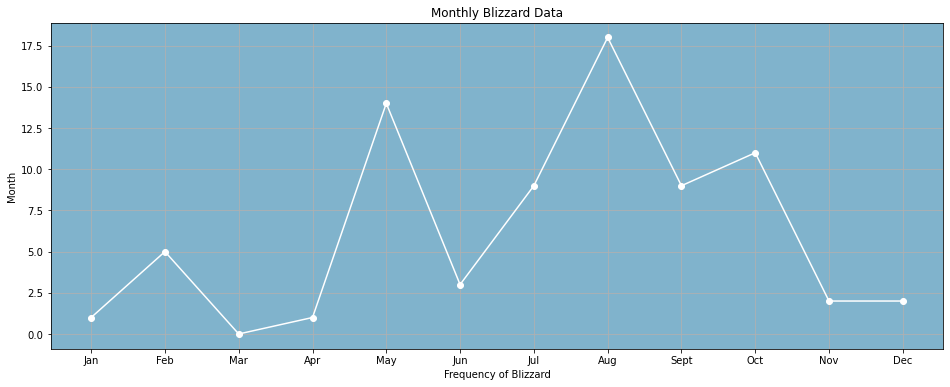

In [11]:
plt.figure(figsize = (16,6))
plt.plot(mday, monthly['blizzard'], marker = 'o', c = 'w')
plt.gca().grid(True)
plt.gca().set_facecolor((0.5, 0.7, 0.8))
plt.title('Monthly Blizzard Data')
plt.xlabel("Frequency of Blizzard")
plt.ylabel("Month")
plt.savefig('Moenthly Data.png', dpi=300)
plt.show()

In [13]:
jan_data = daily[daily.index.month == 2]
jan_data[jan_data['blizzard'] == 1]

,blizzard
2019-02-06,1
2020-02-01,1
2020-02-02,1
2020-02-28,1
2020-02-29,1


In [14]:
jan_data = jan_data.groupby(jan_data.index.day).agg({'blizzard':'sum'})


In [15]:
jan_data

,blizzard
1,1
2,1
3,0
4,0
5,0
6,1
7,0
8,0
9,0
10,0


In [16]:
for i in range(1, 13): 
    months[str(i)] = daily[daily.index.month == i]
    months[str(i)] = months[str(i)].groupby(months[str(i)].index.day).agg({'blizzard':'sum'})


In [17]:
daily[daily.index.month == 1]

,blizzard
2016-01-01,0
2016-01-02,0
2016-01-03,0
2016-01-04,0
2016-01-05,0
...,...
2021-01-27,0
2021-01-28,0
2021-01-29,0
2021-01-30,0


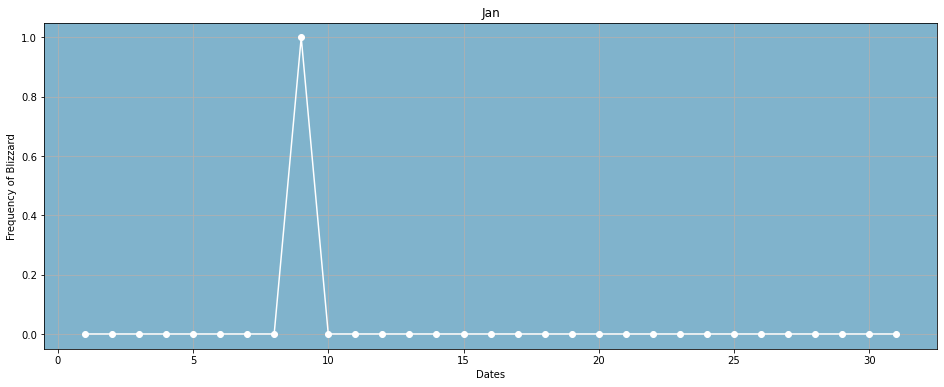

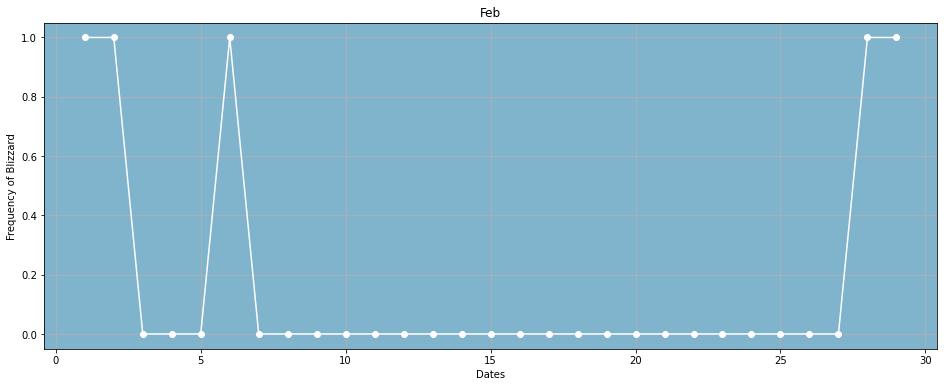

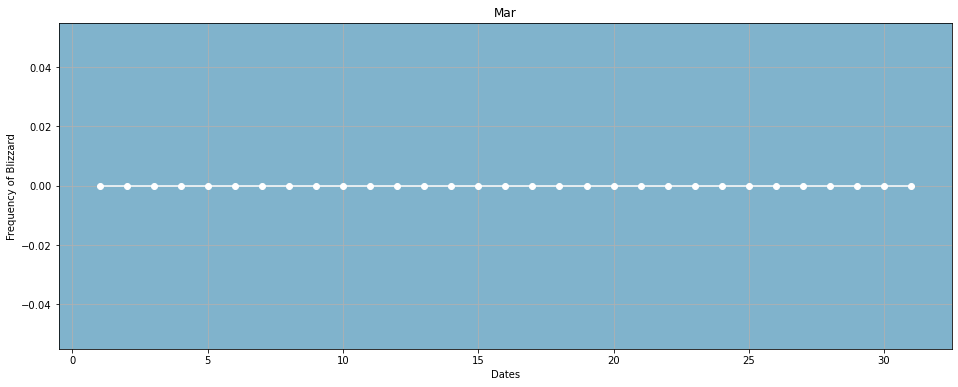

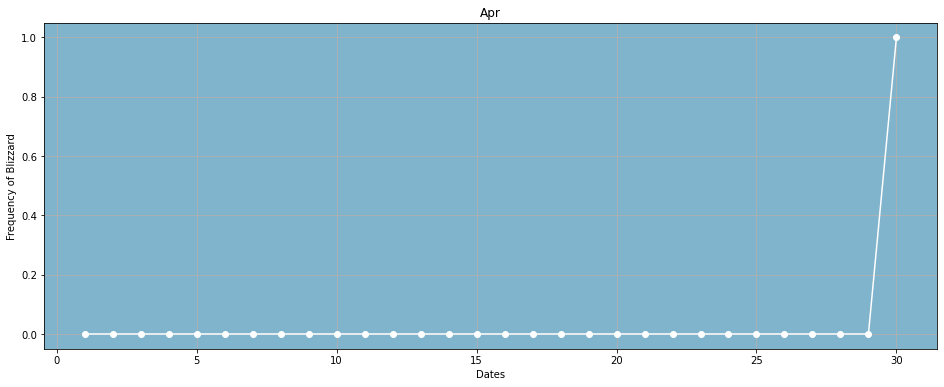

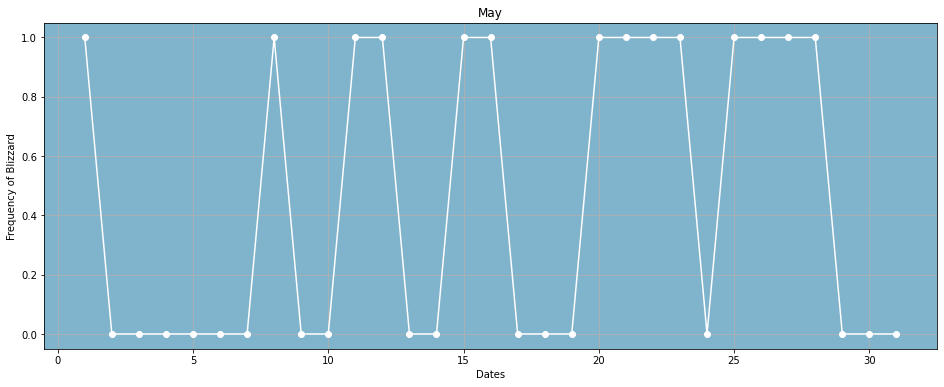

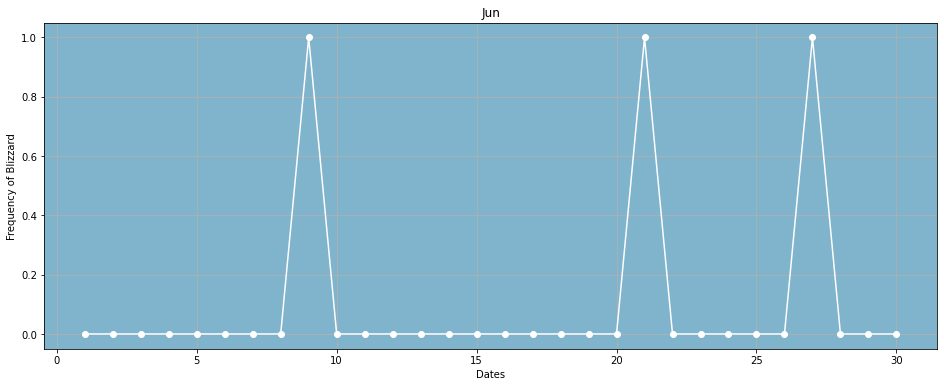

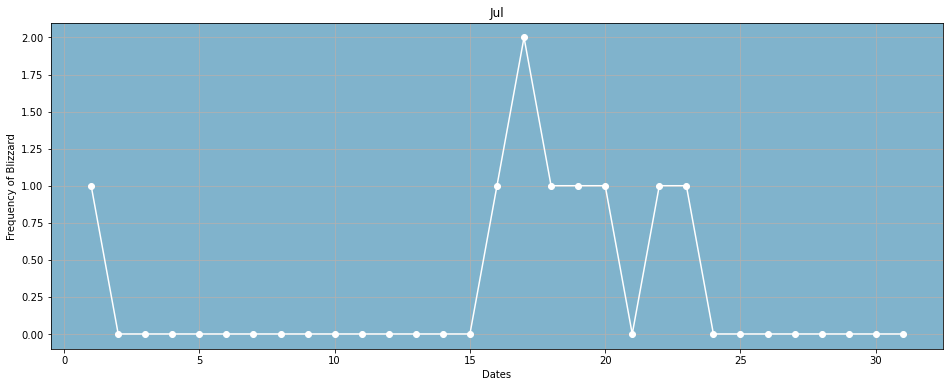

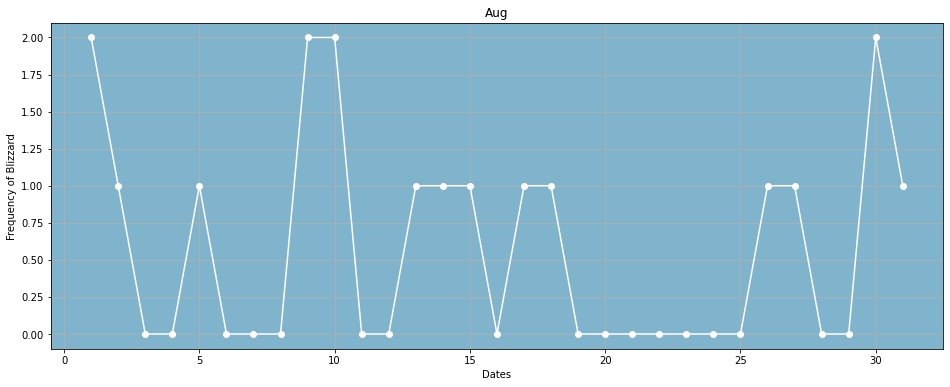

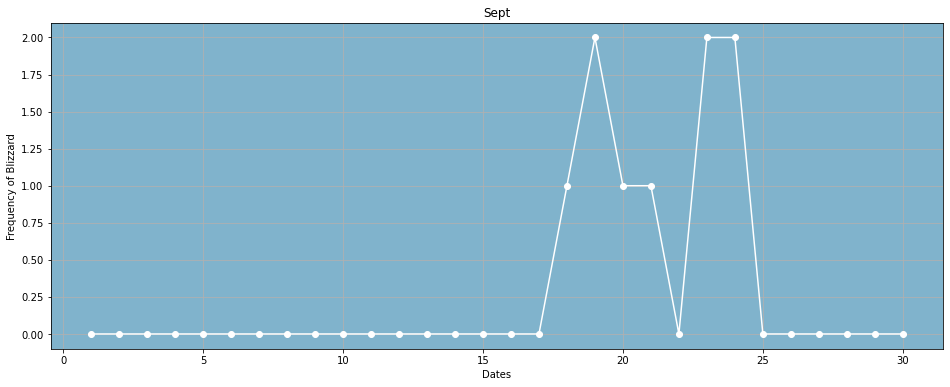

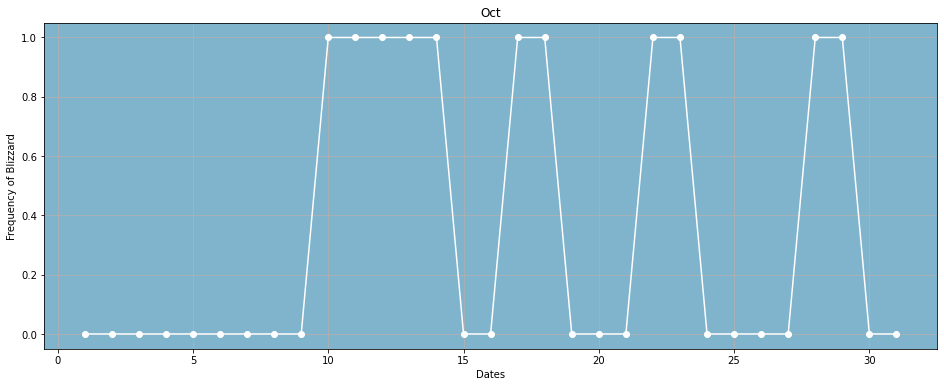

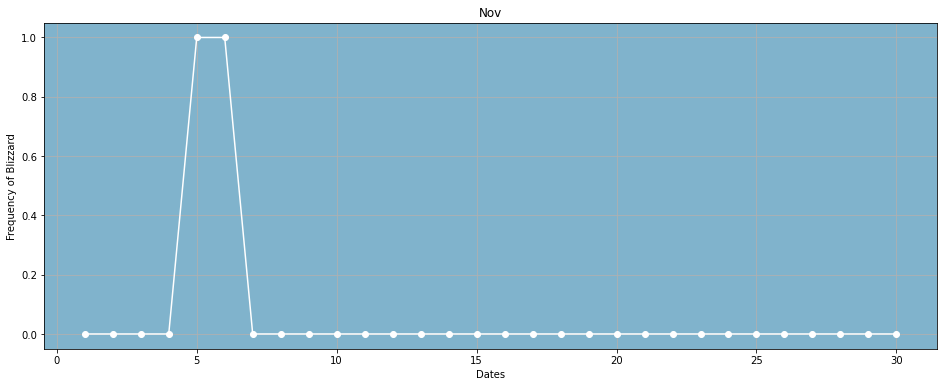

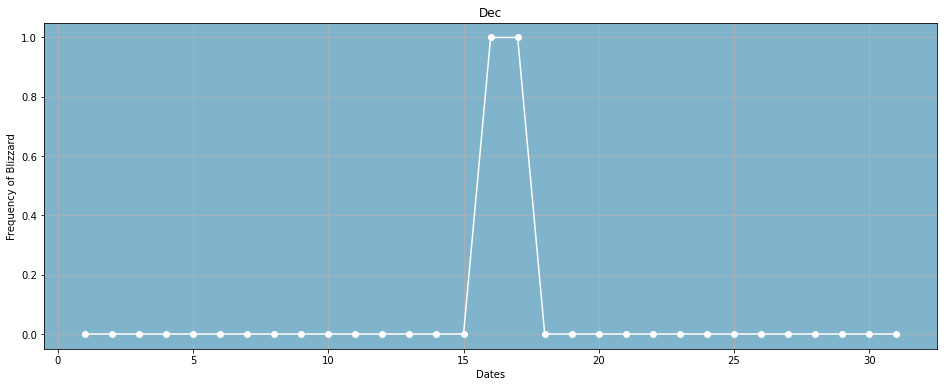

In [21]:
month={
            "1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun",
            "7":"Jul","8":"Aug","9":"Sept","10":"Oct","11":"Nov","12":"Dec"
            }
for i in range(1,13):
    plt.figure(figsize=(16,6))
    plt.plot(months[str(i)].index, months[str(i)]['blizzard'], marker = 'o', c ='w')
    plt.gca().grid(True)
    plt.gca().set_facecolor((0.5, 0.7, 0.8))
    plt.title(month[str(i)], c = 'k')
    plt.xlabel('Dates', c = 'k')
    plt.ylabel('Frequency of Blizzard', c ='k')
    plt.savefig(str(i) + '_' + month[str(i)]+'.png', dpi=300)
    plt.show()

In [31]:
yearly = daily.groupby(daily.index.year).agg({'blizzard':'sum'})
yearly

,blizzard
2016,11
2017,25
2018,8
2019,8
2020,23
2021,0


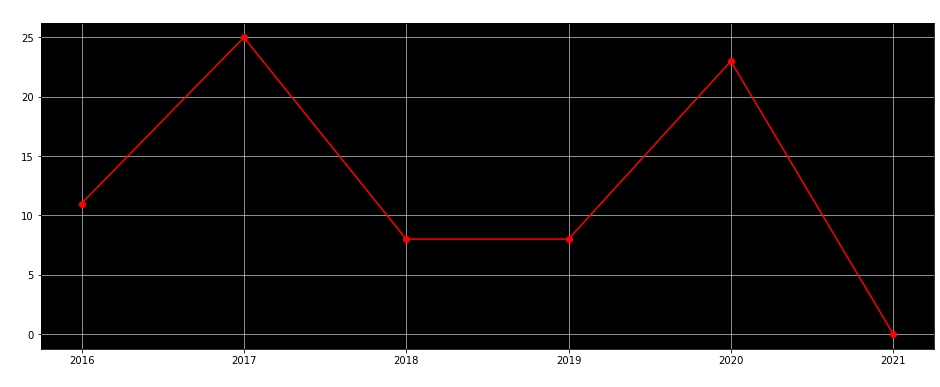

In [32]:
plt.figure(figsize=(16,6))
plt.plot(yearly.index, yearly['blizzard'], marker = 'o', c ='r')
plt.gca().grid(True)
plt.gca().set_facecolor((0,0,0))
plt.title('Yearly Data', c = 'w')
plt.xlabel('Year', c = 'w')
plt.ylabel('Frequency of Blizzard', c ='w')
plt.savefig('Yearly Data.png', dpi=300)
plt.show()